# **2D CNN / Nehir Kırtaş**

# Data Preprocessing

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Performance Metrics Function

In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

def report_performance(predictions, labels):
    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    
        
    if type(predictions).__module__ == torch.__name__ :
        predictions = predictions.tolist()
    if type(labels).__module__ == torch.__name__ :
        labels = labels.tolist()
    
    if type(predictions).__module__ == np.__name__ :
        predictions = list(predictions)
    if type(labels).__module__ == np.__name__ :
        labels = list(labels)
    

    
    size = len(genres);
    i = 0;
    
    while i < 10:
        if i in predictions:        
            for j, x in enumerate(predictions):
                if x == i:
                   predictions[j] = genres[i + size - 10]
        if i in labels:
            for j, x in enumerate(labels):
                if x == i: 
                    labels[j] = genres[i + size - 10]
        else: 
            del genres[i + size - 10]
            size -= 1
        i+=1; 
          

    data = {'y_Actual':    labels,
            'y_Predicted': predictions
            }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
   
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    print(classification_report(labels, predictions))
    
    cnf = multilabel_confusion_matrix(labels, predictions)

    for i in range(0, len(genres)):
        if (cnf[i][0][1]+cnf[i][1][1]) != 0:
            print("Accuracy for", genres[i], "is:", cnf[i][1][1]/(cnf[i][0][1]+cnf[i][1][1]), "\n")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# CNN Model

In [0]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [4]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(8, (5,5),activation='relu', input_shape=(400, 1000, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(8, (5,5),activation='relu'),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(16, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 996, 8)       608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 498, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 498, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 494, 8)       1608      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 247, 8)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 247, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 245, 16)       1

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
),
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/25,validation_split = 0.20,)
# test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/machine learning/rescaled400_daha_net/', 
        target_size=(400, 1000),  
        batch_size=32,
        class_mode='categorical',
        subset="training")

validation_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/machine learning/rescaled400_daha_net/', # same directory as training data
    target_size=(400,1000),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

# test_generator = test_datagen.flow_from_directory(
#     'test/test',
#     target_size=(120,120),
#     batch_size=128,
#     class_mode='categorical',  
# ) 

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


# Training and Evaluating Model

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      validation_data = validation_generator, 
      validation_steps = 8,
      verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
8/8 [==============================] - 143s 18s/step - loss: 101.9609 - accuracy: 0.1055 - val_loss: 2.4977 - val_accuracy: 0.1034
Epoch 2/25
8/8 [==============================] - 77s 10s/step - loss: 4.5678 - accuracy: 0.0820 - val_loss: 2.3089 - val_accuracy: 0.1034
Epoch 3/25
8/8 [==============================] - 77s 10s/step - loss: 2.3071 - accuracy: 0.1211 - val_loss: 2.3025 - val_accuracy: 0.0948
Epoch 4/25
8/8 [==============================] - 7s 864ms/step - loss: 2.2953 - accuracy: 0.1289 - val_loss: 2.3021 - val_accuracy: 0.0962
Epoch 5/25
8/8 [==============================] - 8s 941ms/step - loss: 2.2975 - accuracy: 0.1406 - val_loss: 2.3016 - val_accuracy: 0.1293
Epoch 6/25
8/8 [==============================] - 7s 937ms/step - loss: 2.2894 - accuracy: 0.0586 - val_loss: 2.2953 - val_accuracy: 0.2457
Epoch 7/25
8/8 [==============================] - 7s 890ms/step - loss: 2.2100 - acc

Instructions for updating:
Please use Model.predict, which supports generators.


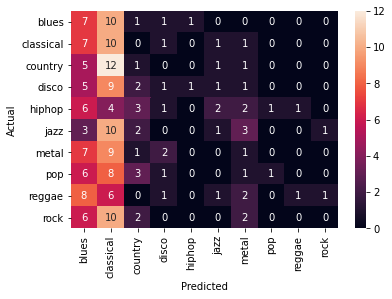

              precision    recall  f1-score   support

       blues       0.12      0.35      0.17        20
   classical       0.11      0.50      0.19        20
     country       0.07      0.05      0.06        20
       disco       0.12      0.05      0.07        20
      hiphop       0.00      0.00      0.00        20
        jazz       0.14      0.05      0.07        20
       metal       0.07      0.05      0.06        20
         pop       0.50      0.05      0.09        20
      reggae       0.50      0.05      0.09        20
        rock       0.00      0.00      0.00        20

    accuracy                           0.12       200
   macro avg       0.16      0.12      0.08       200
weighted avg       0.16      0.12      0.08       200

Accuracy for blues is: 0.11666666666666667 

Accuracy for classical is: 0.11363636363636363 

Accuracy for country is: 0.06666666666666667 

Accuracy for disco is: 0.125 

Accuracy for hiphop is: 0.0 

Accuracy for jazz is: 0.142857142857142

In [8]:
labels = validation_generator.classes
batchSize = 32
steps = 200 / batchSize
predictions = model.predict_generator(validation_generator, steps)
predicted_classes = np.argmax(predictions, axis=1)
report_performance( predicted_classes, labels)

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      validation_data = validation_generator, 
      validation_steps = 8,
      verbose=1)

Epoch 1/25
8/8 [==============================] - 7s 929ms/step - loss: 0.5524 - accuracy: 0.8203 - val_loss: 2.3575 - val_accuracy: 0.2672
Epoch 2/25
8/8 [==============================] - 7s 920ms/step - loss: 0.5971 - accuracy: 0.7930 - val_loss: 2.3742 - val_accuracy: 0.2371
Epoch 3/25
8/8 [==============================] - 7s 886ms/step - loss: 0.6383 - accuracy: 0.8086 - val_loss: 1.9533 - val_accuracy: 0.3317
Epoch 4/25
8/8 [==============================] - 7s 933ms/step - loss: 0.5326 - accuracy: 0.8281 - val_loss: 2.2554 - val_accuracy: 0.2586
Epoch 5/25
8/8 [==============================] - 7s 924ms/step - loss: 0.3927 - accuracy: 0.8945 - val_loss: 2.3690 - val_accuracy: 0.2931
Epoch 6/25
8/8 [==============================] - 7s 883ms/step - loss: 0.5314 - accuracy: 0.8555 - val_loss: 2.5076 - val_accuracy: 0.2802
Epoch 7/25
8/8 [==============================] - 7s 931ms/step - loss: 0.3707 - accuracy: 0.8906 - val_loss: 2.4611 - val_accuracy: 0.2672
Epoch 8/25
8/8 [====

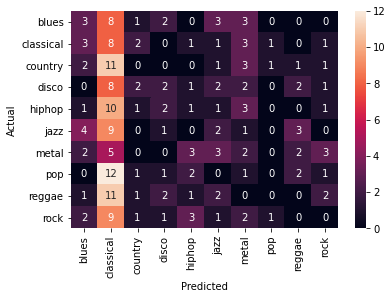

              precision    recall  f1-score   support

       blues       0.17      0.15      0.16        20
   classical       0.09      0.40      0.14        20
     country       0.00      0.00      0.00        20
       disco       0.18      0.10      0.13        20
      hiphop       0.08      0.05      0.06        20
        jazz       0.12      0.10      0.11        20
       metal       0.10      0.10      0.10        20
         pop       0.00      0.00      0.00        20
      reggae       0.00      0.00      0.00        20
        rock       0.00      0.00      0.00        20

    accuracy                           0.09       200
   macro avg       0.07      0.09      0.07       200
weighted avg       0.07      0.09      0.07       200

Accuracy for blues is: 0.16666666666666666 

Accuracy for classical is: 0.08791208791208792 

Accuracy for country is: 0.0 

Accuracy for disco is: 0.18181818181818182 

Accuracy for hiphop is: 0.08333333333333333 

Accuracy for jazz is: 0.1

In [13]:
labels = validation_generator.classes
batchSize = 32
steps = 200 / batchSize
predictions = model.predict_generator(validation_generator, steps)
predicted_classes = np.argmax(predictions, axis=1)
report_performance( predicted_classes, labels)

In [0]:
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']
loss += history.history['loss']
val_loss += history.history['val_loss']

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      validation_data = validation_generator, 
      validation_steps = 8,
      verbose=1)

Epoch 1/25
8/8 [==============================] - 7s 885ms/step - loss: 0.0626 - accuracy: 0.9844 - val_loss: 2.6156 - val_accuracy: 0.2788
Epoch 2/25
8/8 [==============================] - 7s 927ms/step - loss: 0.0917 - accuracy: 0.9805 - val_loss: 2.5235 - val_accuracy: 0.3276
Epoch 3/25
8/8 [==============================] - 7s 930ms/step - loss: 0.0680 - accuracy: 0.9883 - val_loss: 2.8168 - val_accuracy: 0.2716
Epoch 4/25
8/8 [==============================] - 7s 910ms/step - loss: 0.0545 - accuracy: 0.9922 - val_loss: 2.6669 - val_accuracy: 0.2802
Epoch 5/25
8/8 [==============================] - 8s 971ms/step - loss: 0.0563 - accuracy: 0.9805 - val_loss: 2.8118 - val_accuracy: 0.2888
Epoch 6/25
8/8 [==============================] - 7s 911ms/step - loss: 0.0697 - accuracy: 0.9805 - val_loss: 2.6918 - val_accuracy: 0.2759
Epoch 7/25
8/8 [==============================] - 7s 910ms/step - loss: 0.0723 - accuracy: 0.9766 - val_loss: 2.5948 - val_accuracy: 0.3405
Epoch 8/25
8/8 [====

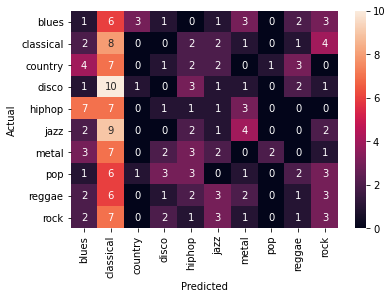

              precision    recall  f1-score   support

       blues       0.04      0.05      0.04        20
   classical       0.11      0.40      0.17        20
     country       0.00      0.00      0.00        20
       disco       0.00      0.00      0.00        20
      hiphop       0.05      0.05      0.05        20
        jazz       0.06      0.05      0.06        20
       metal       0.00      0.00      0.00        20
         pop       0.00      0.00      0.00        20
      reggae       0.08      0.05      0.06        20
        rock       0.15      0.15      0.15        20

    accuracy                           0.07       200
   macro avg       0.05      0.08      0.05       200
weighted avg       0.05      0.07      0.05       200

Accuracy for blues is: 0.04 

Accuracy for classical is: 0.1095890410958904 

Accuracy for country is: 0.0 

Accuracy for disco is: 0.0 

Accuracy for hiphop is: 0.05263157894736842 

Accuracy for jazz is: 0.0625 

Accuracy for metal is: 0.0

In [16]:
labels = validation_generator.classes
batchSize = 32
steps = 200 / batchSize
predictions = model.predict_generator(validation_generator, steps)
predicted_classes = np.argmax(predictions, axis=1)
report_performance( predicted_classes, labels)

In [0]:
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']
loss += history.history['loss']
val_loss += history.history['val_loss']

In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=25,
      validation_data = validation_generator, 
      validation_steps = 8,
      verbose=1)

Epoch 1/25
8/8 [==============================] - 7s 935ms/step - loss: 0.1051 - accuracy: 0.9766 - val_loss: 2.3072 - val_accuracy: 0.3491
Epoch 2/25
8/8 [==============================] - 8s 941ms/step - loss: 0.0424 - accuracy: 0.9922 - val_loss: 2.3440 - val_accuracy: 0.3060
Epoch 3/25
8/8 [==============================] - 7s 875ms/step - loss: 0.0637 - accuracy: 0.9766 - val_loss: 2.6867 - val_accuracy: 0.3276
Epoch 4/25
8/8 [==============================] - 7s 926ms/step - loss: 0.0570 - accuracy: 0.9727 - val_loss: 3.2006 - val_accuracy: 0.2586
Epoch 5/25
8/8 [==============================] - 7s 911ms/step - loss: 0.0302 - accuracy: 0.9961 - val_loss: 2.8914 - val_accuracy: 0.3190
Epoch 6/25
8/8 [==============================] - 7s 914ms/step - loss: 0.0691 - accuracy: 0.9805 - val_loss: 2.3749 - val_accuracy: 0.3578
Epoch 7/25
8/8 [==============================] - 7s 858ms/step - loss: 0.0560 - accuracy: 0.9766 - val_loss: 2.3209 - val_accuracy: 0.3221
Epoch 8/25
8/8 [====

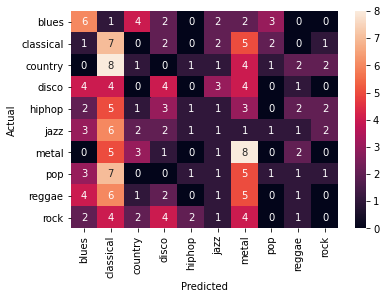

              precision    recall  f1-score   support

       blues       0.24      0.30      0.27        20
   classical       0.13      0.35      0.19        20
     country       0.07      0.05      0.06        20
       disco       0.20      0.20      0.20        20
      hiphop       0.17      0.05      0.08        20
        jazz       0.07      0.05      0.06        20
       metal       0.20      0.40      0.26        20
         pop       0.12      0.05      0.07        20
      reggae       0.09      0.05      0.06        20
        rock       0.00      0.00      0.00        20

    accuracy                           0.15       200
   macro avg       0.13      0.15      0.13       200
weighted avg       0.13      0.15      0.13       200

Accuracy for blues is: 0.24 

Accuracy for classical is: 0.1320754716981132 

Accuracy for country is: 0.07142857142857142 

Accuracy for disco is: 0.2 

Accuracy for hiphop is: 0.16666666666666666 

Accuracy for jazz is: 0.07142857142857142

In [19]:
labels = validation_generator.classes
batchSize = 32
steps = 200 / batchSize
predictions = model.predict_generator(validation_generator, steps)
predicted_classes = np.argmax(predictions, axis=1)
report_performance( predicted_classes, labels)

In [0]:
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']
loss += history.history['loss']
val_loss += history.history['val_loss']

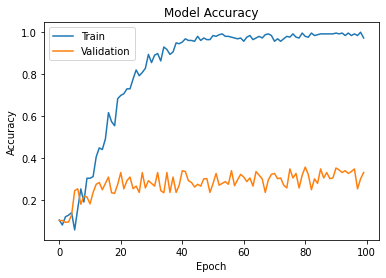

In [21]:
# summarize history for accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

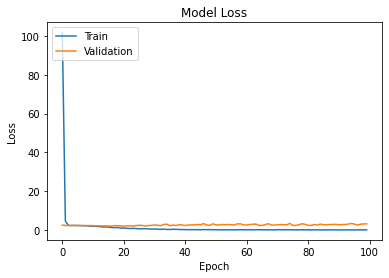

In [22]:
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()